Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as display
from sklearn.preprocessing import MinMaxScaler


Load the Dataset

In [2]:
df = pd.read_csv("C:\\Users\\pm5cd\\Documents\\SentinelNet-AI\\SentinelNet\\data\\NSL-KDD\\KDDTrain+.txt", header=None)
cols= (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])
df.columns = cols[:len(df.columns)]

Summary statistics

In [3]:
print("Number of rows:",len(df))
print("Unique labels:",df['level'].nunique())
print("Top 5 frequent attack types:\n", df['level'].value_counts().head())

Number of rows: 125973
Unique labels: 22
Top 5 frequent attack types:
 level
21    62557
18    20667
20    19339
19    10284
15     3990
Name: count, dtype: int64


Bar Chart ( Distribution of Attack )

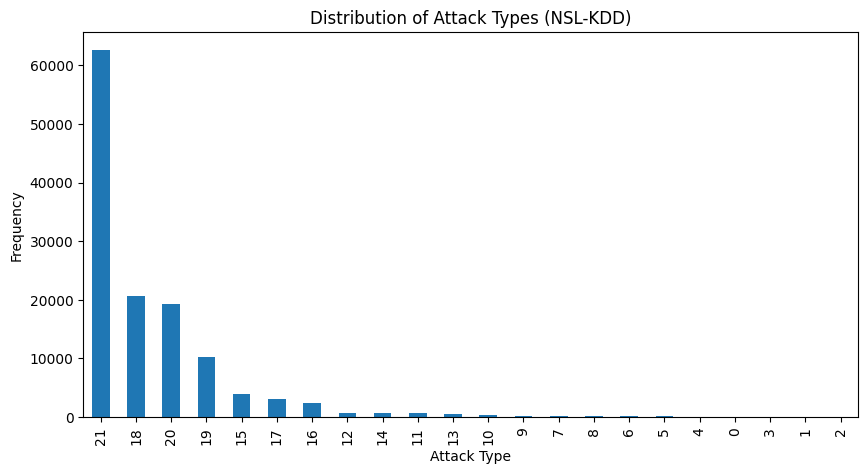

In [4]:
df['level'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title("Distribution of Attack Types (NSL-KDD)")
plt.xlabel("Attack Type")
plt.ylabel("Frequency")
plt.show()

Basic Inspection

In [5]:
print(df.head())
print(df.info())
print(df.describe())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

Exploring the Features Types

In [6]:
overview=pd.DataFrame({"Feature":df.columns,
                       "Type":df.dtypes,
                       "unique_values":[df[c].nunique() for c in df.columns]
})
print(overview.head(15))

                             Feature    Type  unique_values
duration                    duration   int64           2981
protocol_type          protocol_type  object              3
service                      service  object             70
flag                            flag  object             11
src_bytes                  src_bytes   int64           3341
dst_bytes                  dst_bytes   int64           9326
land                            land   int64              2
wrong_fragment        wrong_fragment   int64              3
urgent                        urgent   int64              4
hot                              hot   int64             28
num_failed_logins  num_failed_logins   int64              6
logged_in                  logged_in   int64              2
num_compromised      num_compromised   int64             88
root_shell                root_shell   int64              2
su_attempted            su_attempted   int64              3


Visualize Attack Type Distribution

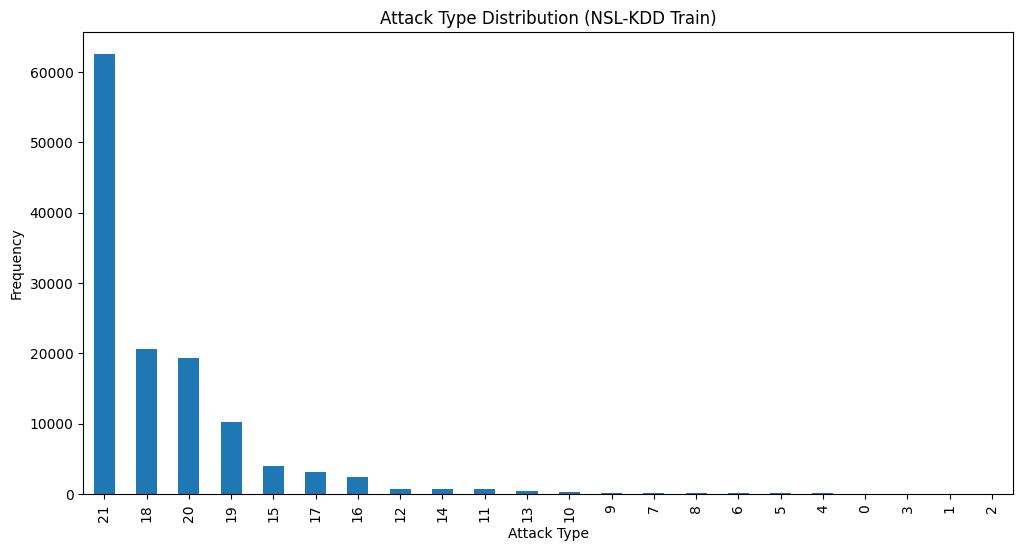

In [7]:
df['level'].value_counts().plot(kind='bar',figsize=(12,6))
plt.title("Attack Type Distribution (NSL-KDD Train)")
plt.xlabel("Attack Type")
plt.ylabel("Frequency")
plt.show()

Group Attacks into Catergories & Analyze Frequency

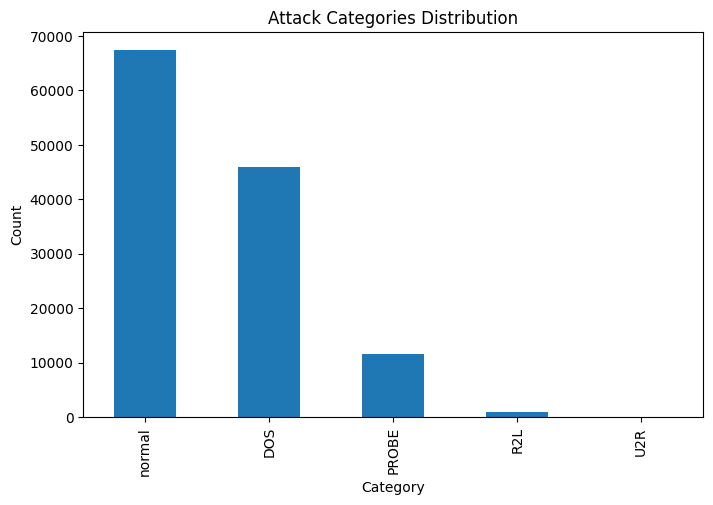

Category
normal    0.534583
DOS       0.364578
PROBE     0.092528
R2L       0.007899
U2R       0.000413
Name: proportion, dtype: float64


In [8]:
df['outcome'] = df['outcome'].astype(str).str.strip().str.lower().str.replace('.', '', regex=False)
DOS = {'back','land','neptune','pod','smurf','teardrop','mailbomb','apache2','processtable','udpstorm'}
PROBE = {'satan','ipsweep','nmap','portsweep','mscan','saint'}
R2L = {'guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop',
       'snmpguess','snmpgetattack','httptunnel','sendmail','named'}
U2R = {'buffer_overflow','loadmodule','perl','rootkit','sqlattack','xterm','ps'}

def map_category(x):
    if x == 'normal':
        return 'normal'
    elif x in DOS:
        return 'DOS'
    elif x in PROBE:
        return 'PROBE'
    elif x in R2L:
        return 'R2L'
    elif x in U2R:
        return 'U2R'
    else:
        return 'May be other'
df['Category'] = df['outcome'].apply(map_category)
df['Category'].value_counts().plot(kind='bar',figsize=(8,5))
plt.title("Attack Categories Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
print(df['Category'].value_counts(normalize=True))

Identify Catergorical vs Numerical features

In [9]:
categorical=["protocol_type","service","flag"]
binary=["land","logged_in","root_shell","su_attempted","is_host_login","is_guest_login"]
numerical=[col for col in df.columns if col not in categorical+binary+['level']]
print("Categorical features:",categorical)
print("Binary features:",binary)
print("Numerical features (first 10):", numerical[:10])

Categorical features: ['protocol_type', 'service', 'flag']
Binary features: ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
Numerical features (first 10): ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations']


Checking the dataset for missing values and duplicate entries

In [10]:
print("Missing values per Column : ")
print(df.isnull().sum())
print("\n Duplicate Rows :", df.duplicated().sum())

Missing values per Column : 
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate 

### Creating Schema Mapping Table

We will generate a table with :
1. Feature Name
2. Type (Categorical/Numerical/Binary)
3. Suggested Preprocessing Action
4. Semantic Category

In [11]:
schema=[]
for col in df.columns:
    if col in categorical:
        schema.append([col, "Categorical", "One-Hot Encode", "Network/Connection"])
    elif col in binary:
        schema.append([col, "Binary", "Keep as-is", "Behavior/Privilege"])
    elif col == "level":
        schema.append([col, "Target", "Map to Attack/Normal", "Class Level"])
    else:
        schema.append([col, "Numerical", "Normalize/Standardize", "Traffic/Statistical"])
schema_df = pd.DataFrame(schema, columns=["Feature Name", "Type", "Preprocessing Action", "Semantic Category"])
display.display(schema_df.head(15))

,Feature Name,Type,Preprocessing Action,Semantic Category
0,duration,Numerical,Normalize/Standardize,Traffic/Statistical
1,protocol_type,Categorical,One-Hot Encode,Network/Connection
2,service,Categorical,One-Hot Encode,Network/Connection
3,flag,Categorical,One-Hot Encode,Network/Connection
4,src_bytes,Numerical,Normalize/Standardize,Traffic/Statistical
5,dst_bytes,Numerical,Normalize/Standardize,Traffic/Statistical
6,land,Binary,Keep as-is,Behavior/Privilege
7,wrong_fragment,Numerical,Normalize/Standardize,Traffic/Statistical
8,urgent,Numerical,Normalize/Standardize,Traffic/Statistical
9,hot,Numerical,Normalize/Standardize,Traffic/Statistical


Compare NSL-KDD Schema with CICIDS2017 Metadata

In [12]:
cicids=pd.read_csv("C:\\Users\\pm5cd\\Documents\\SentinelNet-AI\\SentinelNet\\data\\CICIDS2017\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print("\nCICIDS2017 Features:",list(cicids.columns)[:15])
print("NSL-KDD Features:",list(df.columns)[:15])
print(f"\nNSL-KDD has {len(df.columns)-1} features (excluding level)")
print(f"\nCICIDS2017 has {len(cicids.columns)-1} features (excluding level)")
overlap=set(df.columns).intersection(set(cicids.columns))
print("\nOverlapping Features:",overlap if overlap else "None")



CICIDS2017 Features: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s']
NSL-KDD Features: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted']

NSL-KDD has 43 features (excluding level)

CICIDS2017 has 78 features (excluding level)

Overlapping Features: None


Identifying and Handling Duplicate and Missing Values and removing the duplicate rows

In [13]:
print("Missing Values per column: \n",df.isnull().sum())
print("Duplicate Rows: ",df.duplicated().sum())
df=df.drop_duplicates()
print("Shape after removing duplicates:",df.shape)

Missing Values per column: 
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate 

Encode Categorical Features

In [14]:
categorical_features=["protocol_type", "service", "flag"]
df_encoded = pd.get_dummies(df, columns=categorical_features)
print("Columns after encoding:", df_encoded.shape[1])

Columns after encoding: 125


Scale Numerical Features

In [15]:
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_features = ["land","logged_in","root_shell","su_attempted","is_host_login","is_guest_login"]
numeric_cols = [col for col in numeric_cols if col not in categorical_features+binary_features+["level"]]
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
print("Scaling completed. Shape:", df_encoded.shape)
print("Simple preprocessing complete. Dataset shape:", df.shape)



Scaling completed. Shape: (125973, 125)
Simple preprocessing complete. Dataset shape: (125973, 44)
